# Linear Regression with Multiple Features
Andrew Ng Machine Learning Coursera ex1_multi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Load data
data = np.loadtxt('/Users/devin/ML/machine-learning-ex1/ex1/ex1data2.txt',delimiter=",")
X = data[:,:2]
y = data[:,2]
m = len(y)
y = y.reshape((m,1))

### Part 1: Normalize Features

In [8]:
# Normalize features
def feature_normalize(X):
    mu = np.zeros((1,np.shape(X)[1]))
    sigma = np.zeros((1,np.shape(X)[1]))
    mu = sum(X) / len(X)
    sigma = np.std(X,axis=0)
    X = (X - mu) / sigma
    return X, mu, sigma

In [9]:
X, mu, sigma = feature_normalize(X)

In [10]:
# Add column of ones to X
X = np.concatenate((np.ones((m,1)), X),axis=1)

### Part 2: Gradient Descent

In [11]:
def compute_cost(X,y,theta):
    J = sum((np.dot(X,theta) - y)**2) / (2*m)
    return J

In [12]:
# Choose some alpha value
alpha = 1
num_iters = 50

In [13]:
# Initialize theta
theta = np.zeros((np.shape(X)[1],1))

In [14]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        theta = theta - (alpha / m) * np.dot((np.dot(X,theta)-y).T,X).T
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history

In [15]:
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)
print(theta)

[[ 340412.65957447]
 [ 109447.79646961]
 [  -6578.35485416]]


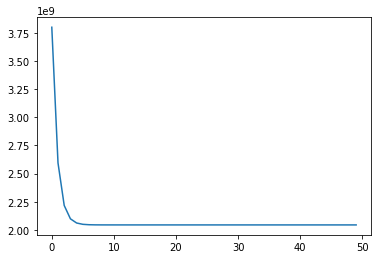

In [16]:
plt.plot([x for x in range(len(J_history))],J_history)

In [17]:
# Estimate the price of a 1650 sq-ft, 3 br house
house = np.array([[1. , 1650., 3.]])
house[0,1] = (house[0,1] - mu[0]) / sigma[0]
house[0,2] = (house[0,2] - mu[1]) / sigma[1]
prediction = np.dot(house,theta)
print(prediction)

[[ 293081.46433491]]


### Part 3: Normal Equations

In [18]:
# Load data
data = np.loadtxt('/Users/devin/ML/machine-learning-ex1/ex1/ex1data2.txt',delimiter=",")
X = data[:,:2]
y = data[:,2]
m = len(y)
y = y.reshape((m,1))
# Add column of ones to X
X = np.concatenate((np.ones((m,1)), X),axis=1)

In [19]:
def normal_equation(X,y):
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [20]:
theta = normal_equation(X,y)
print(theta)

[[ 89597.9095428 ]
 [   139.21067402]
 [ -8738.01911233]]


In [21]:
# Estimate the price of a 1650 sq-ft, 3 br house
house = np.array([[1. , 1650., 3.]])
prediction = np.dot(house,theta)
print(prediction)

[[ 293081.46433489]]
